# Comprehensive Bivariate Analysis

01. Import depedencies

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

02. Load Dataset

In [2]:
df = pd.read_csv('../data/raw/TelcoCustomerChurnPrediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 03. Bivariate Analysis

### Categorical vs Categorical
- Measures:
    - Chi-square test of independence
    - Contingency tables
    - Cramer’s V / Phi coefficient (strength of association)
     Odds ratio (for binary categories)

- Visualizations:
    - Crosstab (frequency table)
    - Grouped Bar Chart
    - Mosaic Plot
    - Heatmap of proportions

### Categorical vs Numerical
- Measures:
    - t-test (two groups, e.g., Male vs Female Income)
    - ANOVA (more than two groups, e.g., Income across multiple Education levels)
    - Effect Size (Cohen’s d, Eta-squared)

- Visualizations:
    - Boxplot
    - Violin Plot
    - Barplot with error bars (mean ± CI)

### Numerical vs Numerical
- Measures:
    - Correlation Coefficient (Pearson, Spearman, Kendall)
    - Simple Linear Regression
    - Covariance

- Visualizations:
    - Scatter Plot (with regression line)
    - Pair Plot (Seaborn pairplot)
    - Heatmap of correlations

### 3.1 Churn vs Demographics

In [4]:
# Categorical vs Categorical
demographic_features = [
                            "gender", "SeniorCitizen", "Partner", "Dependents"
                       ]

In [11]:
# Crosstab (contingency table)
for feat in demographic_features:
    print(f"\n --- Contingency Table for {feat} ---")
    ct = pd.crosstab(df[feat], df["Churn"], normalize="index") * 100
    print(ct)

    # optionally chi-squaure test

    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"\nChi-Square Value for {feat}:", chi2)
    print(f"Degrees of Freedom for {feat}:", dof)
    print(f"P-Value for {feat}:", p)
    print(f"Expected Frequencies for {feat}:\n", expected)

    # Interpretation
    if p < 0.05:
        print(f"\nReject H₀: There is a significant association between {feat} and Churn.")
    else:
        print(f"\nFail to reject H₀: No significant association between {feat} and Churn.")


 --- Contingency Table for gender ---
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338

Chi-Square Value for gender: 0.0
Degrees of Freedom for gender: 1
P-Value for gender: 1.0
Expected Frequencies for gender:
 [[73.45939544 26.54060456]
 [73.45939544 26.54060456]]

Fail to reject H₀: No significant association between gender and Churn.

 --- Contingency Table for SeniorCitizen ---
Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261

Chi-Square Value for SeniorCitizen: 6.630074875819638
Degrees of Freedom for SeniorCitizen: 1
P-Value for SeniorCitizen: 0.010027104944620521
Expected Frequencies for SeniorCitizen:
 [[67.3562853 32.6437147]
 [67.3562853 32.6437147]]

Reject H₀: There is a significant association between SeniorCitizen and Churn.

 --- Contingency Table for Partner ---
Churn           No        Yes
Partner          

### Insights from Chi-sqaure test

- Gender does not influence customer churn in this dataset.
    - Business takeaway: Gender-based targeting for churn reduction is not effective.

- Senior citizens are much more likely to churn than younger customers.
    - Business takeaway: Seniors may have different needs (pricing, support, digital literacy) → consider senior-friendly retention strategies (discounts, specialized support).

- Having a partner seems to reduce churn risk.
    - Business takeaway: Customers without partners may need stronger engagement/loyalty programs, since they are at higher risk.

- Having dependents is linked to lower churn risk.
    - Business takeaway: Customers with dependents may find the service more essential/reliable → focus retention efforts on customers without dependents.

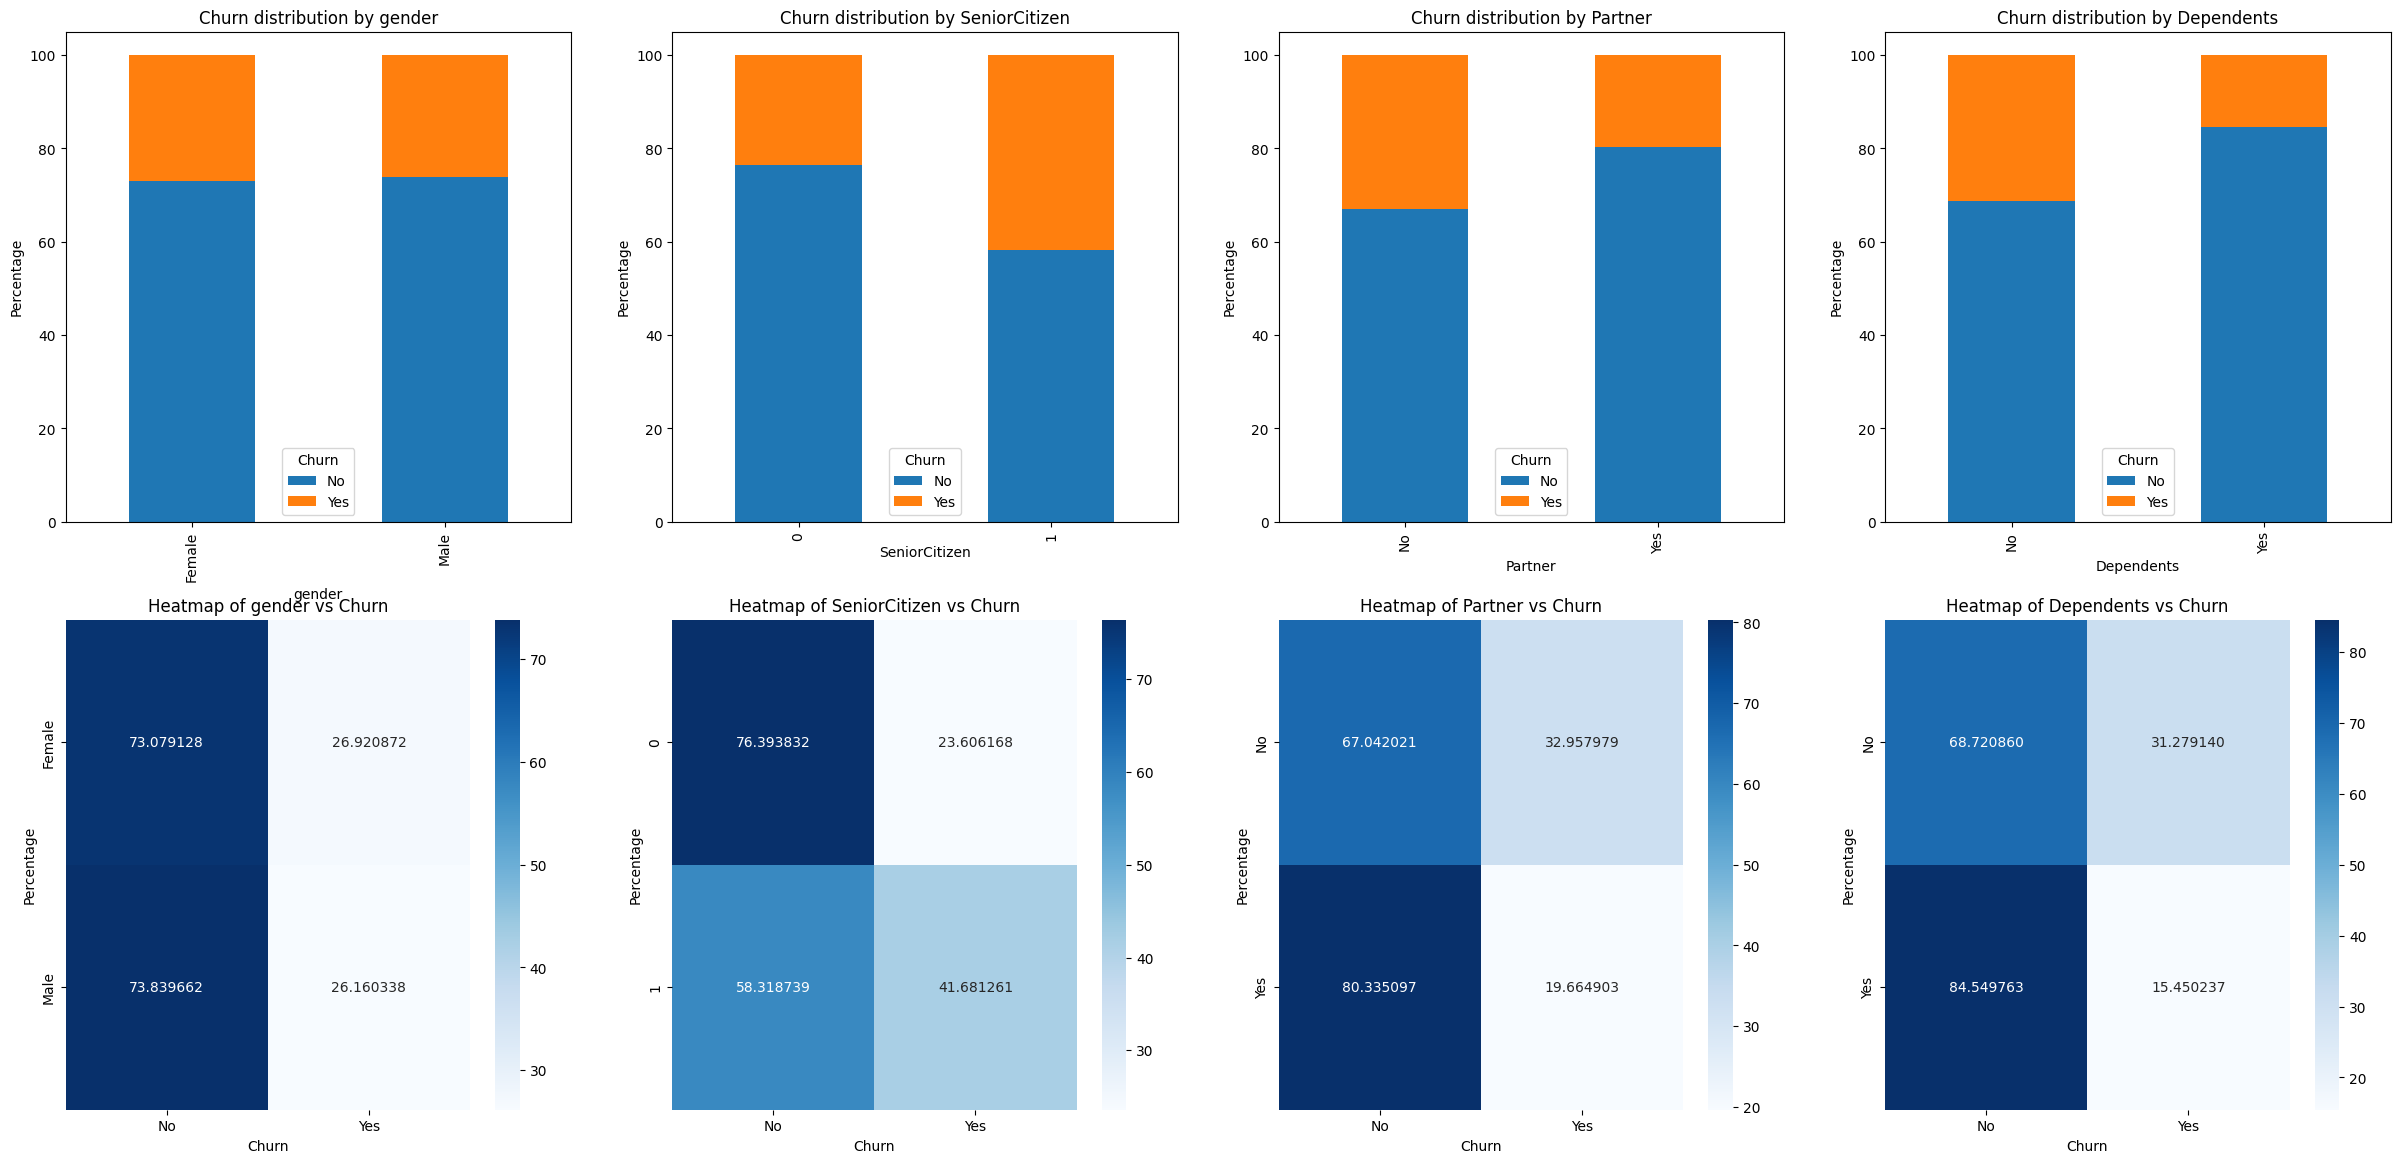

In [34]:
# Visualize
fig, axes = plt.subplots(2, 4, figsize=(30, 14))
for i, feat in enumerate(demographic_features):
    ct = pd.crosstab(df[feat], df["Churn"], normalize="index") * 100

    # Stacked bar chart
    ct.plot(kind="bar", stacked=True, ax=axes[0, i])
    axes[0, i].set_title(f"Churn distribution by {feat}")
    axes[0, i].set_ylabel("Percentage")

    sns.heatmap(ct, annot=True, cmap="Blues", fmt="f", ax=axes[1, i])
    axes[1, i].set_title(f"Heatmap of {feat} vs Churn")
    axes[1, i].set_ylabel("Percentage")

### 3.2 Churn vs Services

In [44]:
# Numerical vs Categorical
numerical_service_features = ["tenure"]
print("\n --- t-test ---")

# t-test
group_no = df[df["Churn"]=="No"]["tenure"]
group_yes = df[df["Churn"]=="Yes"]["tenure"]

t_stat, p_val = stats.ttest_ind(group_no, group_yes, equal_var=False)  # Welch’s t-test

print("Mean (No Churn):", group_no.mean())
print("Mean (Yes Churn):", group_yes.mean())
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

print("\n --- Null and Alternative Hypothesis --- \n    H₀: Mean Tenure of both groups is equal.\n    H₁: Mean Tenures are significantly different.")

# Interpretation
if p_val < 0.05:
    print("\nReject H₀: Significant difference in Tenure between churned and non-churned customers.")
else:
    print("\nFail to reject H₀: No significant difference in Tenure between churned and non-churned customers.")



 --- t-test ---
Mean (No Churn): 37.56996521066873
Mean (Yes Churn): 17.979133226324237
T-statistic: 34.824
P-value: 0.000

 --- Null and Alternative Hypothesis --- 
    H₀: Mean Tenure of both groups is equal.
    H₁: Mean Tenures are significantly different.

Reject H₀: Significant difference in Tenure between churned and non-churned customers.


### Business insights from tenure t-test
- Customers who do not churn stay more than 2x longer than those who churn.
- Business Insights
    - Customers who have been with the company longer are much less likely to churn.
    - Customers with low tenure (<18 months) are at much higher risk of churning.
    - Early-stage customers (new joiners) should be prioritized for engagement campaigns (e.g., onboarding support, discounts, loyalty perks).
    - Long-tenure customers are more stable → focus on cross-sell/upsell rather than churn prevention.
    - Tenure is a very strong predictor for churn in a machine learning model.


Text(0, 0.5, 'Tenure')

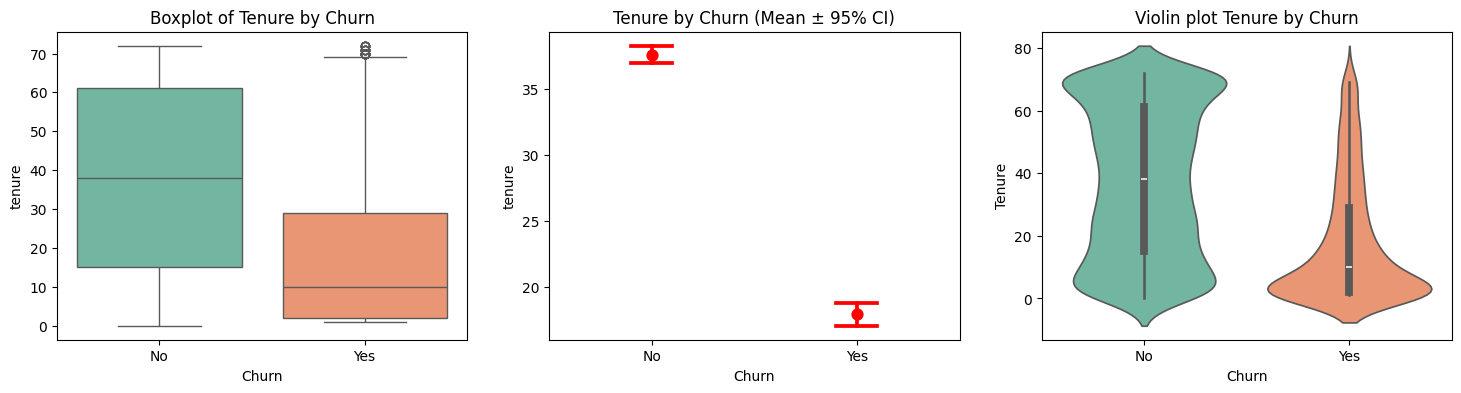

In [43]:
# Visualizing

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
# --- Boxplot ---
sns.boxplot(x="Churn", y="tenure", data=df, palette="Set2", ax=axes[0])
axes[0].set_title(f"Boxplot of Tenure by Churn")

# --- Boxplot with error bars (mean ± 95% CI) ---
sns.pointplot(x="Churn", y="tenure", data=df, capsize=0.2, ci=95, join=False, color="red", ax=axes[1])
axes[1].set_title(f"Tenure by Churn (Mean ± 95% CI)")

# --- Violin with ---
sns.violinplot(x="Churn", y="tenure", data=df, inner="box", palette="Set2", ax=axes[2])
axes[2].set_title("Violin plot Tenure by Churn")
axes[2].set_xlabel("Churn")
axes[2].set_ylabel("Tenure")

In [46]:
service_features = [
                        "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "Contract",
                        "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",  "PaperlessBilling"
                   ]

In [49]:
# categorical vs categorical
# Crosstab (contingency table)
for feat in service_features:
    print("---------------------------------------------------------------------------------")
    print(f"\n --- Contingency Table for {feat} ---")
    ct = pd.crosstab(df[feat], df["Churn"], normalize="index") * 100
    print(ct)

    # optionally chi-squaure test

    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"\nChi-Square Value for {feat}:", chi2)
    print(f"Degrees of Freedom for {feat}:", dof)
    print(f"P-Value for {feat}:", p)
    print(f"Expected Frequencies for {feat}:\n", expected)

    # Interpretation
    if p < 0.05:
        print(f"\nReject H₀: There is a significant association between {feat} and Churn.")
    else:
        print(f"\nFail to reject H₀: No significant association between {feat} and Churn.")


---------------------------------------------------------------------------------

 --- Contingency Table for PhoneService ---
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637

Chi-Square Value for PhoneService: 0.016003532528930376
Degrees of Freedom for PhoneService: 1
P-Value for PhoneService: 0.8993321366576386
Expected Frequencies for PhoneService:
 [[74.18183847 25.81816153]
 [74.18183847 25.81816153]]

Fail to reject H₀: No significant association between PhoneService and Churn.
---------------------------------------------------------------------------------

 --- Contingency Table for MultipleLines ---
Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896

Chi-Square Value for MultipleLines: 0.45335779127351594
Degrees of Freedom for MultipleLines: 

### Insights about service features from chi-squared test

* Whether a customer has a phone line (`PhoneService`) or multiple lines (`MultipleLines`) **does not influence churn**.

  * Business takeaway: Phone-related offerings may not impact churn; focus retention efforts elsewhere.

* Internet service type (`InternetService`) is strongly linked to churn.

  * **Fiber optic customers** have a much higher churn rate compared to DSL or no internet.
  * Business takeaway: Fiber optic customers may need retention strategies like improved service quality or tailored offers.

* Value-added services like **OnlineSecurity, DeviceProtection, and TechSupport** significantly reduce churn.

  * Customers lacking these services churn more.
  * Business takeaway: Offering and promoting security and support services can improve retention.

* Contract type (`Contract`) is strongly associated with churn.

  * Month-to-month customers churn the most; one-year and two-year contracts retain customers better.
  * Business takeaway: Encourage longer-term contracts to reduce churn risk.

* Entertainment services like **StreamingTV** and **StreamingMovies** have a moderate but significant effect on churn.

  * Customers without streaming services churn slightly more.
  * Business takeaway: Streaming services may contribute to engagement, but they are not the primary driver of churn.

* **PaperlessBilling** is associated with higher churn.

  * Customers using paperless billing have higher churn rates than those with traditional billing.
  * Business takeaway: Paperless billing customers may require targeted engagement or incentive programs to prevent churn.


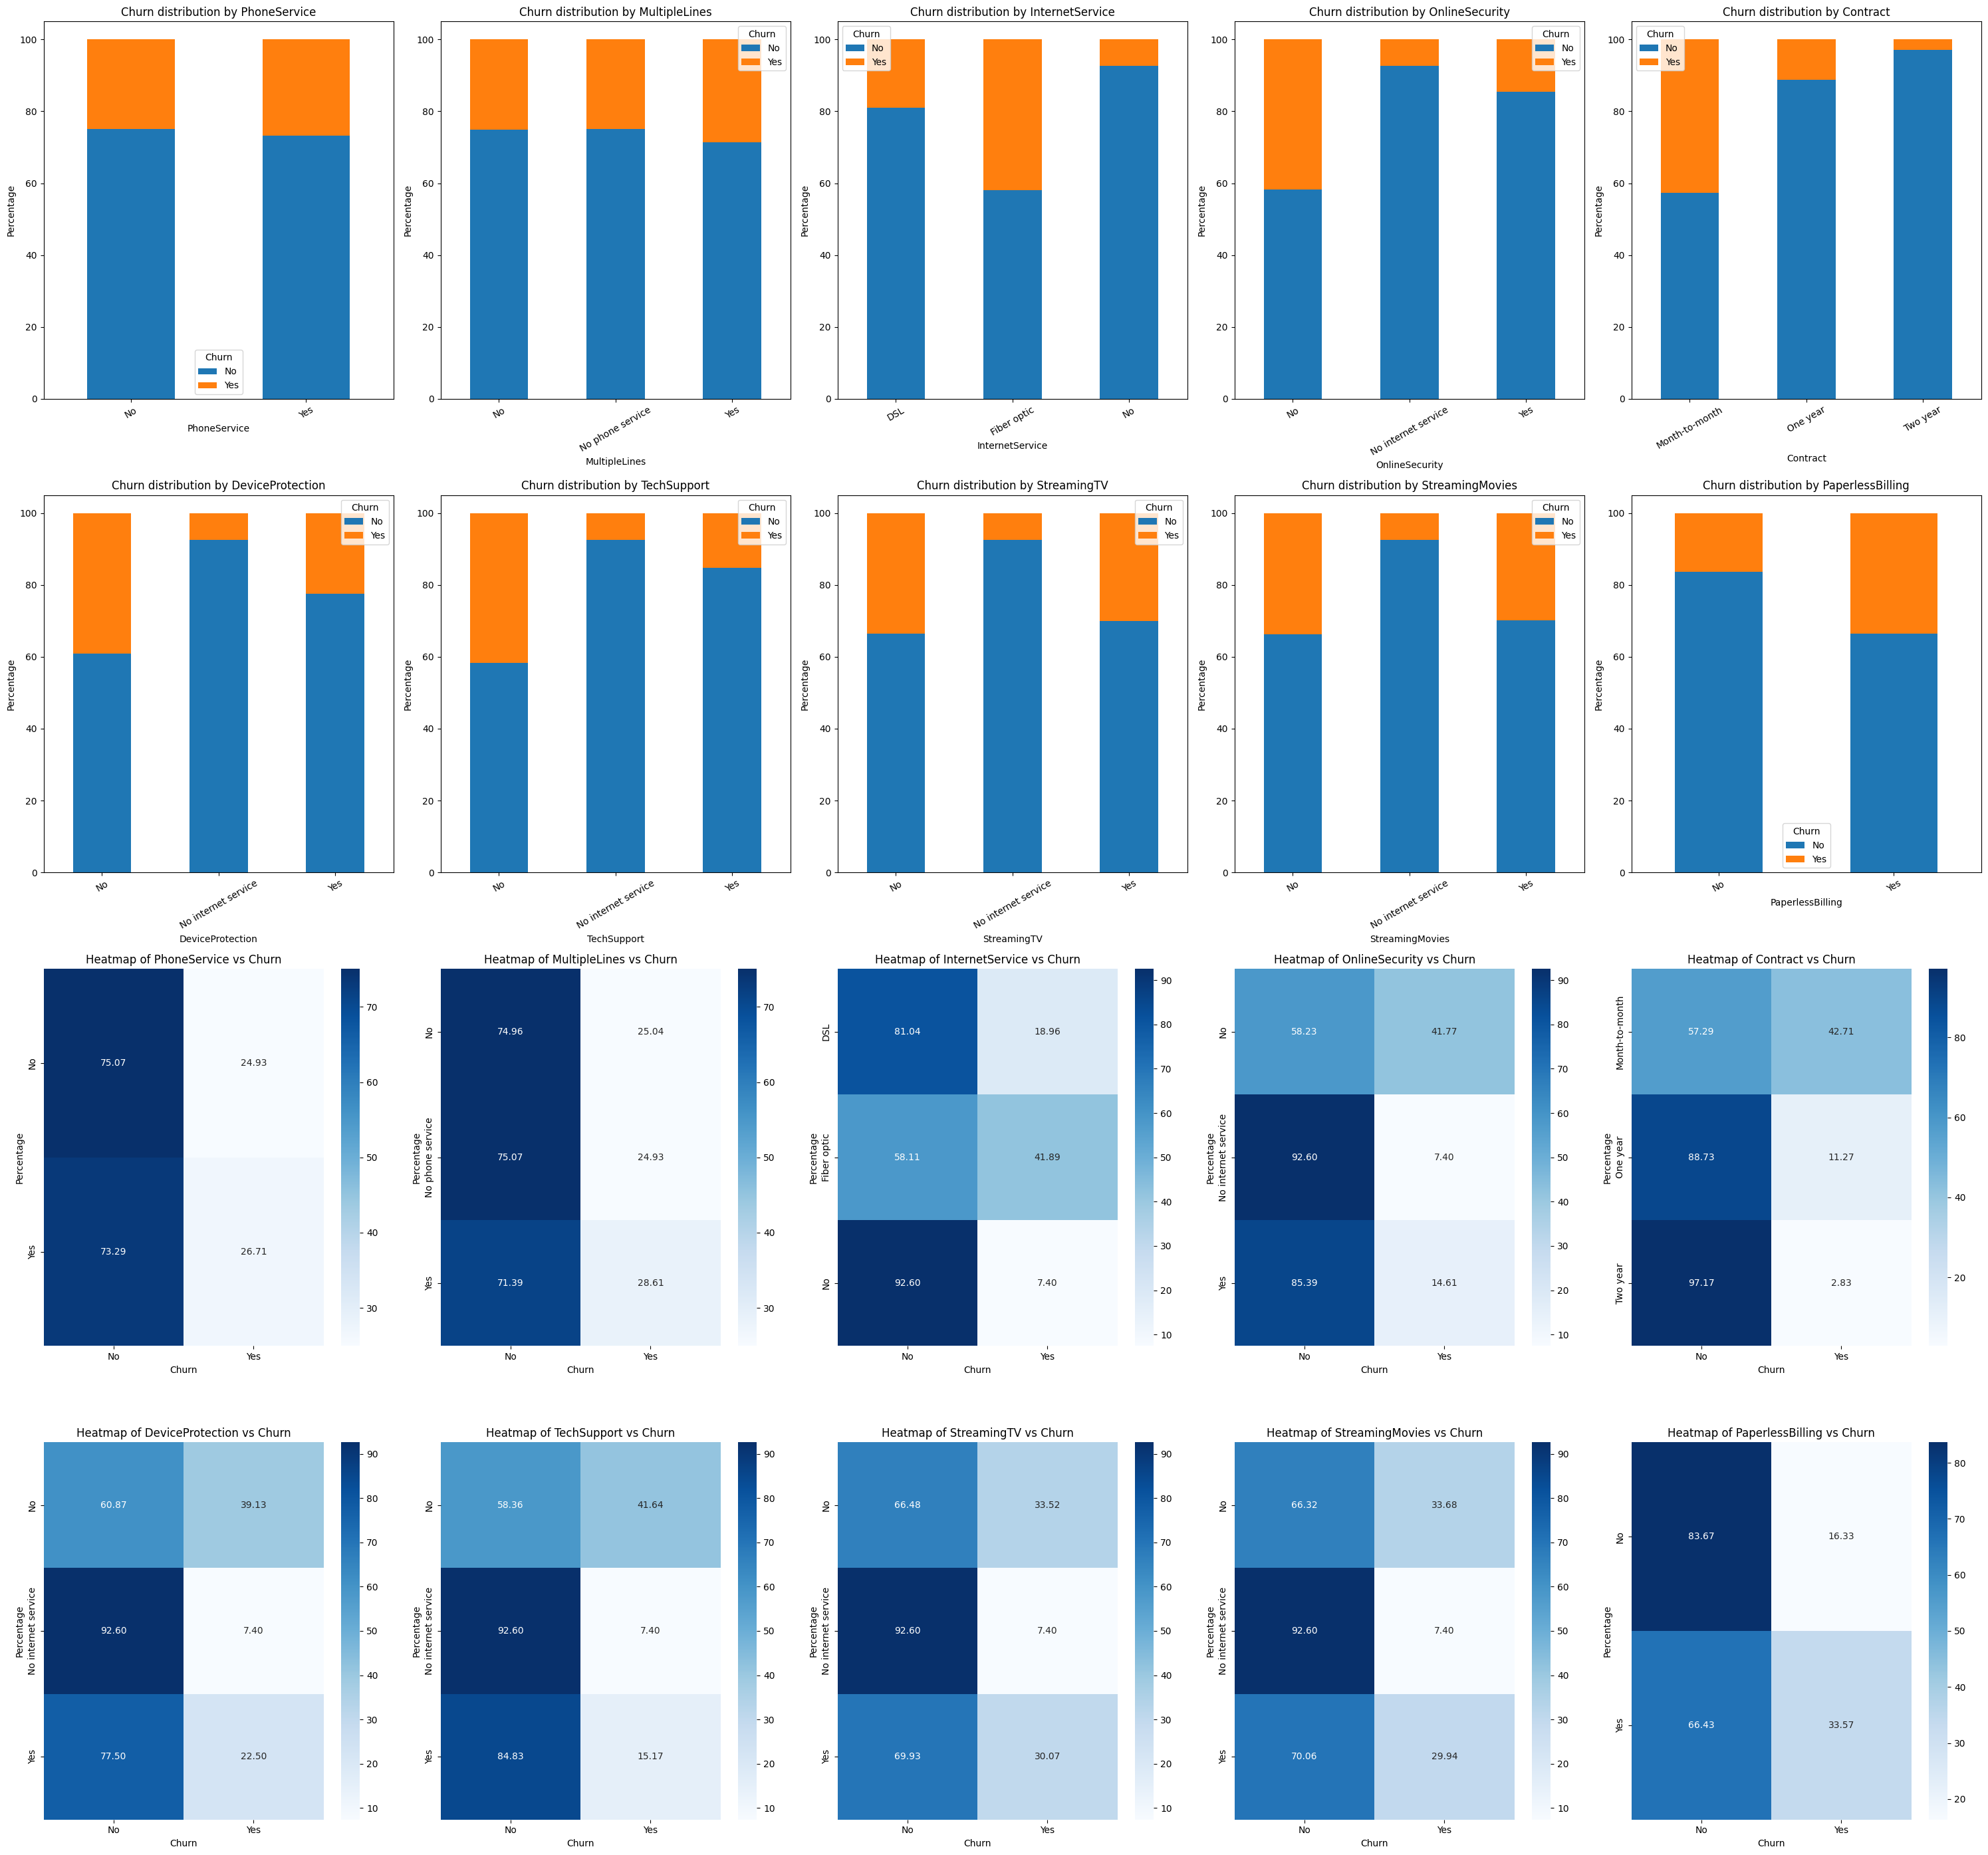

In [55]:
service_features = [
    ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "Contract"],
    ["DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]
]
# Visualize
fig, axes = plt.subplots(4, 5, figsize=(30, 28))

for i in range(2):
    for j in range(5):
        feat = service_features[i][j]
        ct = pd.crosstab(df[feat], df["Churn"], normalize="index") * 100

        # Stacked bar chart
        ct.plot(kind="bar", stacked=True, ax=axes[i, j])
        axes[i, j].set_title(f"Churn distribution by {feat}")
        axes[i, j].set_ylabel("Percentage")
        axes[i, j].tick_params(axis='x', rotation=30)

        # Heatmap
        sns.heatmap(ct, annot=True, cmap="Blues", fmt=".2f", ax=axes[i + 2, j])
        axes[i + 2, j].set_title(f"Heatmap of {feat} vs Churn")
        axes[i + 2, j].set_ylabel("Percentage")

plt.tight_layout()
plt.show()

### 3.2 Churn vs Financial

In [61]:
financial_features_numerical = [
                                   "MonthlyCharges", "TotalCharges"
                               ]

financial_features_categorical = [
                                          "PaymentMethod"
                                   ]

df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [63]:
# Numerical vs Categorical
for feat in financial_features_numerical:
    print("-----------------------------------------------------------------------")
    print(f"\n --- t-test for {feat} with Churn ---")

    # t-test
    group_no = df[df["Churn"]=="No"][feat]
    group_yes = df[df["Churn"]=="Yes"][feat]

    t_stat, p_val = stats.ttest_ind(group_no, group_yes, equal_var=False)  # Welch’s t-test

    print(f"{feat} Mean (No Churn):", group_no.mean())
    print(f"{feat} Mean (Yes Churn):", group_yes.mean())
    print(f"{feat} T-statistic: {t_stat:.3f}")
    print(f"{feat} P-value: {p_val:.3f}")

    print("\n --- Null and Alternative Hypothesis --- \n    H₀: Mean Tenure of both groups is equal.\n    H₁: Mean Tenures are significantly different.")

    # Interpretation
    if p_val < 0.05:
        print(f"\nReject H₀: Significant difference in {feat} between churned and non-churned customers.")
    else:
        print(f"\nFail to reject H₀: No significant difference in {feat} between churned and non-churned customers.")


-----------------------------------------------------------------------

 --- t-test for MonthlyCharges with Churn ---
MonthlyCharges Mean (No Churn): 61.26512369540008
MonthlyCharges Mean (Yes Churn): 74.44133226324237
MonthlyCharges T-statistic: -18.408
MonthlyCharges P-value: 0.000

 --- Null and Alternative Hypothesis --- 
    H₀: Mean Tenure of both groups is equal.
    H₁: Mean Tenures are significantly different.

Reject H₀: Significant difference in MonthlyCharges between churned and non-churned customers.
-----------------------------------------------------------------------

 --- t-test for TotalCharges with Churn ---
TotalCharges Mean (No Churn): 2555.344141003293
TotalCharges Mean (Yes Churn): 1531.7960941680042
TotalCharges T-statistic: nan
TotalCharges P-value: nan

 --- Null and Alternative Hypothesis --- 
    H₀: Mean Tenure of both groups is equal.
    H₁: Mean Tenures are significantly different.

Fail to reject H₀: No significant difference in TotalCharges between c

### Insights from t-test about numerical financial features


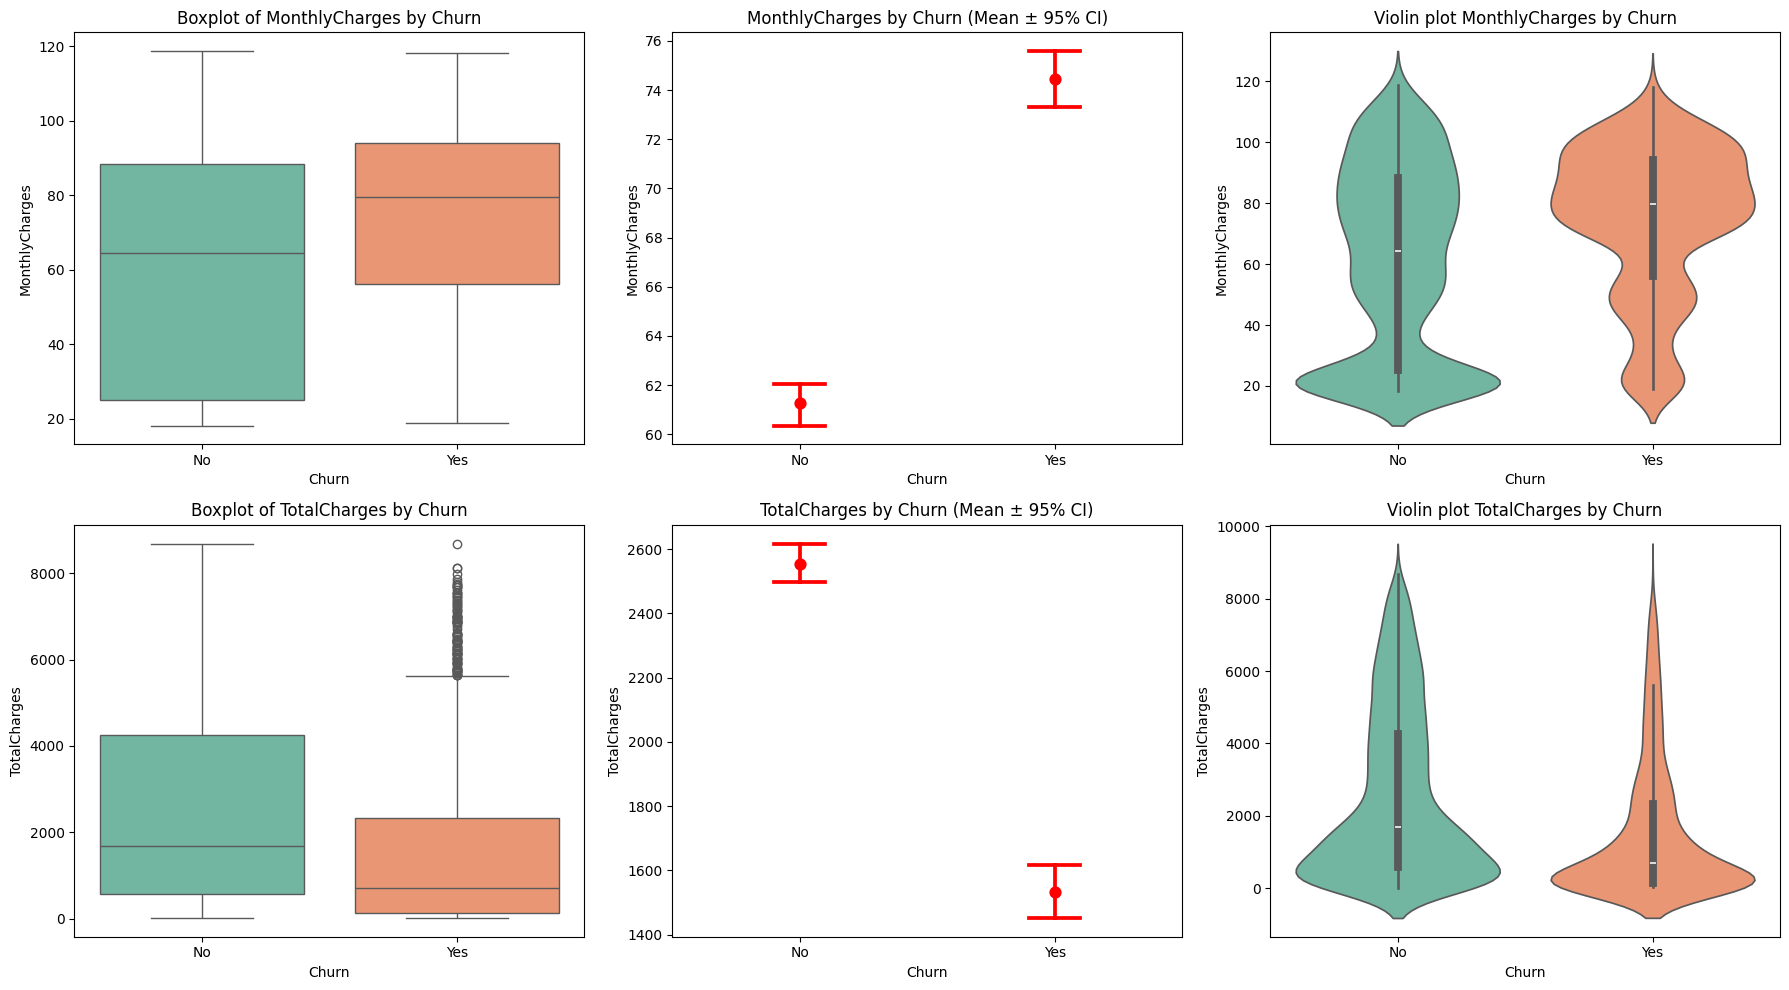

In [67]:
# Visualizing

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feat in enumerate(financial_features_numerical):
    # --- Boxplot ---
    sns.boxplot(x="Churn", y=feat, data=df, palette="Set2", ax=axes[i, 0])
    axes[i, 0].set_title(f"Boxplot of {feat} by Churn")

    # --- Boxplot with error bars (mean ± 95% CI) ---
    sns.pointplot(x="Churn", y=feat, data=df, capsize=0.2, ci=95, join=False, color="red", ax=axes[i, 1])
    axes[i, 1].set_title(f"{feat} by Churn (Mean ± 95% CI)")

    # --- Violin with ---
    sns.violinplot(x="Churn", y=feat, data=df, inner="box", palette="Set2", ax=axes[i, 2])
    axes[i, 2].set_title(f"Violin plot {feat} by Churn")
    axes[i, 2].set_xlabel("Churn")
    axes[i, 2].set_ylabel(feat)
    
plt.tight_layout()
plt.show()